In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Dans ce projet d'immobilier, l'objectif est de prédire le prix de vente d'une maison (SalePrice) en utilisant plusieurs caractéristiques liées à la propriété. Cela aidera les acheteurs, les vendeurs et les agents immobiliers à mieux évaluer la valeur d'une propriété en fonction de ses attributs.

 <span style="color:blue">Explications des variables:</span>
- `OverallQual` : Qualité globale des matériaux et de la finition. Souvent très corrélé au prix de vente. (note sur 10, entier)
- `GrLivArea` : Surface habitable hors sous-sol. Directement liée à la taille de la maison.
- `TotalBsmtSF` : Superficie totale du sous-sol. Ajoute une grande valeur à la propriété.
- `1stFlrSF` : Superficie du rez-de-chaussée. Indique la taille de la maison.
- `YearBuilt` : Année de construction. Les maisons plus récentes ont tendance à se vendre à un prix plus élevé.
- `YearRemodAdd` : Année de rénovation. Les rénovations récentes peuvent augmenter le prix.
- `GarageCars` : Capacité du garage en nombre de voitures. Un élément clé pour de nombreux acheteurs.
- `GarageArea` : Taille du garage en pieds carrés.
- `FullBath` : Nombre de salles de bains complètes. Un facteur important pour le confort de la maison.
- `TotRmsAbvGrd` : Nombre total de pièces au-dessus du sol (hors salles de bains). Plus il y a de pièces, plus le bien est généralement cher.
- `KitchenQual` : Qualité de la cuisine. Une cuisine de haute qualité ajoute une grande valeur.
- `Fireplaces` : Nombre de cheminées. Une caractéristique qui peut augmenter l'attrait et la valeur d'une propriété.
- `LotArea` : Surface totale du terrain. La taille du lot est un facteur important, notamment dans les zones urbaines.
- `Neighborhood` : Emplacement physique au sein des limites de la ville. L'emplacement a un impact majeur sur les prix de l'immobilier.
- `ExterQual` : Qualité du matériau extérieur. Un indicateur de la qualité globale de la maison.
- `SalePriceè` : Prix de vente de la maison. C'est la variable cible que nous devons prédire.

In [3]:
data = pd.read_csv("kaggle_train_set.csv")
data.head()

,OverallQual,GrLivArea,TotalBsmtSF,1stFlrSF,YearBuilt,YearRemodAdd,GarageCars,GarageArea,FullBath,TotRmsAbvGrd,KitchenQual,Fireplaces,LotArea,Neighborhood,ExterQual,SalePrice
0,7,1710,856,856,2003,2003,2,548,2,8,Gd,0,8450,CollgCr,Gd,208500
1,6,1262,1262,1262,1976,1976,2,460,2,6,TA,1,9600,Veenker,TA,181500
2,7,1786,920,920,2001,2002,2,608,2,6,Gd,1,11250,CollgCr,Gd,223500
3,8,1694,1686,1694,2004,2005,2,636,2,7,Gd,1,10084,Somerst,Gd,307000
4,7,1774,952,1022,1931,1950,2,468,2,8,TA,2,6120,OldTown,TA,129900


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1180 entries, 0 to 1179
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   OverallQual   1180 non-null   int64 
 1   GrLivArea     1180 non-null   int64 
 2   TotalBsmtSF   1180 non-null   int64 
 3   1stFlrSF      1180 non-null   int64 
 4   YearBuilt     1180 non-null   int64 
 5   YearRemodAdd  1180 non-null   int64 
 6   GarageCars    1180 non-null   int64 
 7   GarageArea    1180 non-null   int64 
 8   FullBath      1180 non-null   int64 
 9   TotRmsAbvGrd  1180 non-null   int64 
 10  KitchenQual   1180 non-null   object
 11  Fireplaces    1180 non-null   int64 
 12  LotArea       1180 non-null   int64 
 13  Neighborhood  1180 non-null   object
 14  ExterQual     1180 non-null   object
 15  SalePrice     1180 non-null   int64 
dtypes: int64(13), object(3)
memory usage: 147.6+ KB


In [5]:
data.isna().sum()

OverallQual     0
GrLivArea       0
TotalBsmtSF     0
1stFlrSF        0
YearBuilt       0
YearRemodAdd    0
GarageCars      0
GarageArea      0
FullBath        0
TotRmsAbvGrd    0
KitchenQual     0
Fireplaces      0
LotArea         0
Neighborhood    0
ExterQual       0
SalePrice       0
dtype: int64

In [6]:
data.nunique()

OverallQual      10
GrLivArea       761
TotalBsmtSF     638
1stFlrSF        666
YearBuilt       110
YearRemodAdd     61
GarageCars        5
GarageArea      390
FullBath          4
TotRmsAbvGrd     12
KitchenQual       4
Fireplaces        4
LotArea         882
Neighborhood     25
ExterQual         4
SalePrice       591
dtype: int64

In [ ]:
# recuperation des variables numeriques et categorielles
num_col = data.select_dtypes(include='number').columns
categorical_col = data.select_dtypes(exclude='number').columns

### Analyse du data

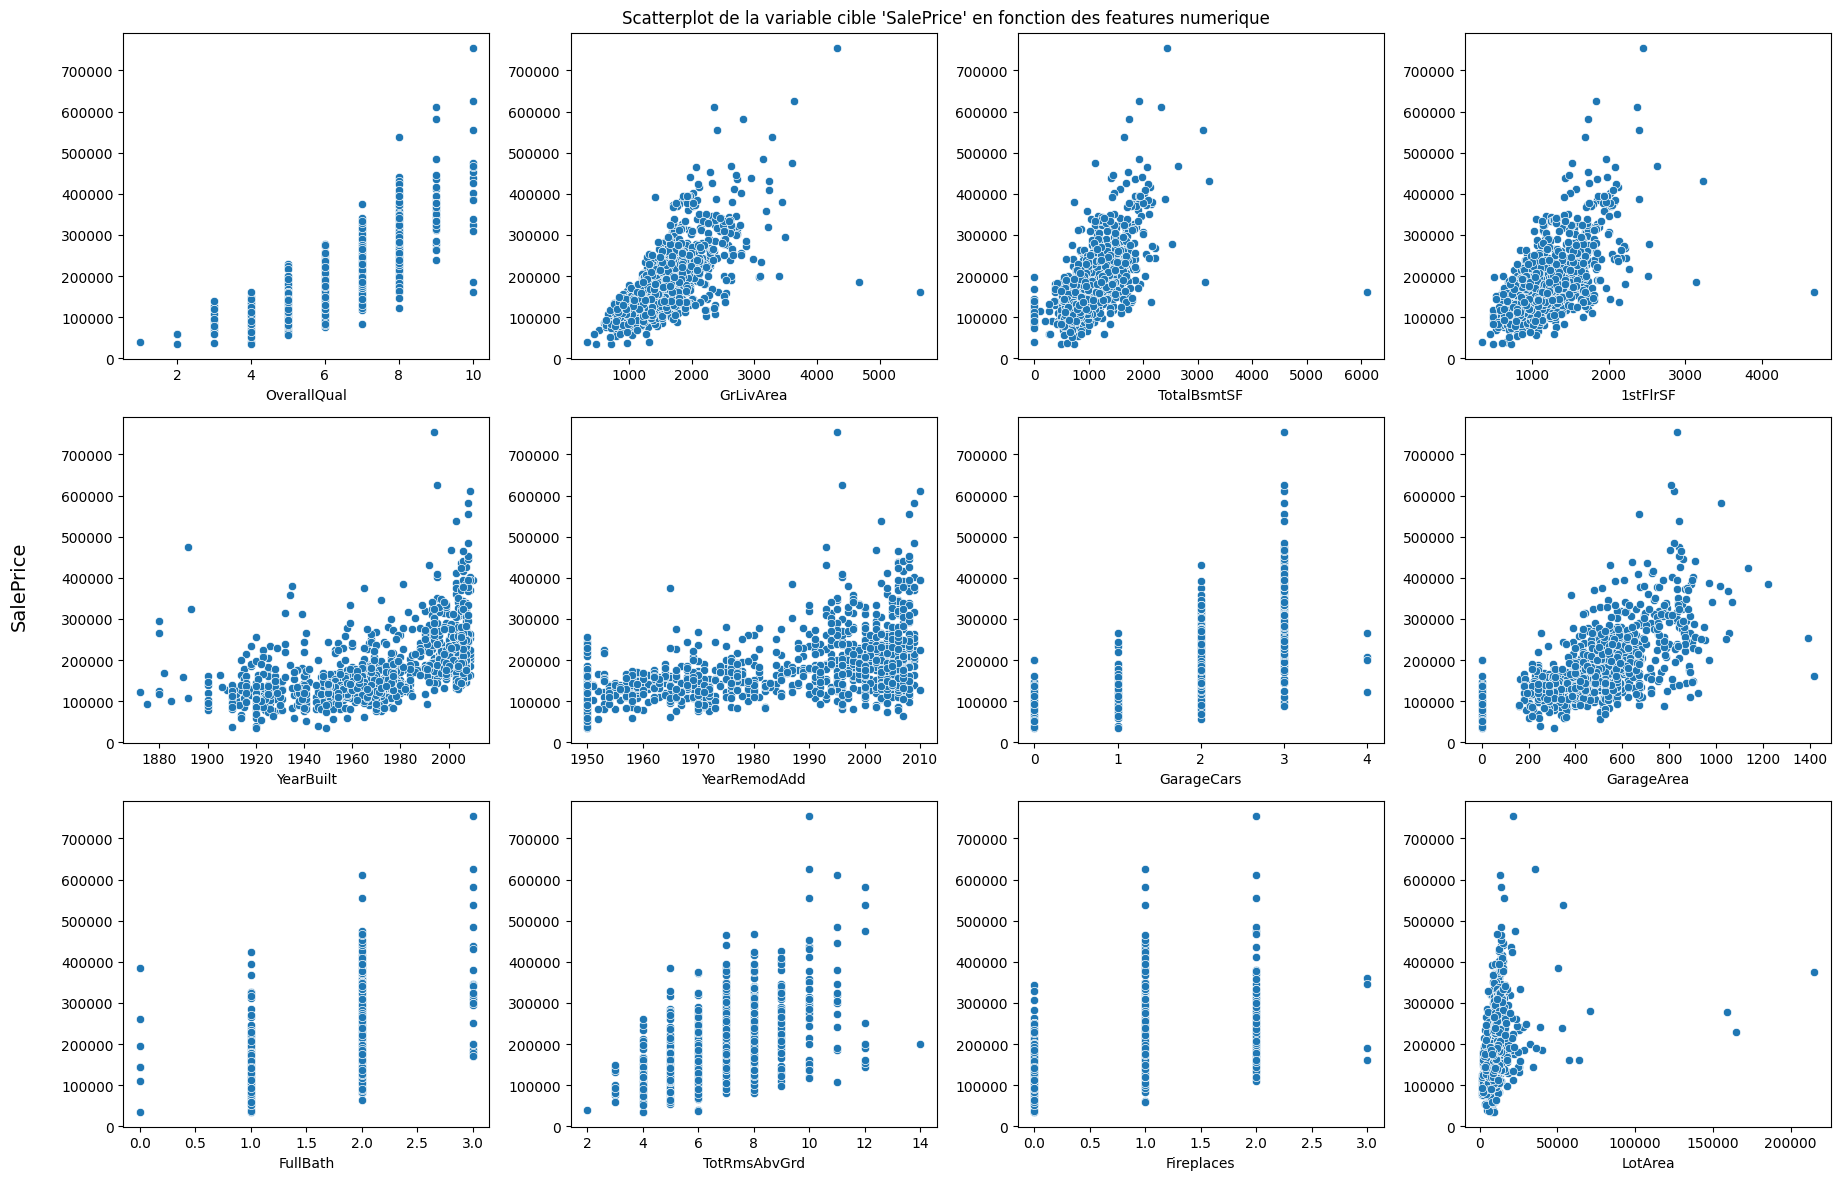

In [24]:
fig, axes = plt.subplots(3, 4, figsize = (18,12))
axes = axes.flatten()
for i in range(len(num_col)-1):
    sns.scatterplot(data=data, x = num_col[i], y = "SalePrice", ax=axes[i] )
    axes[i].set_ylabel('')

# Ajouter un label commun à l'axe Y
fig.text(-0.02, 0.5, 'SalePrice', va='center', rotation='vertical', fontsize=14)
plt.suptitle("Scatterplot de la variable cible 'SalePrice' en fonction des features numerique")
plt.tight_layout()
plt.show()    

In [50]:
print(
    data.groupby("OverallQual")["SalePrice"].mean(), "\n\n",
    data.groupby("TotRmsAbvGrd")["SalePrice"].mean(), "\n\n",
)

OverallQual
1      39300.000000
2      51770.333333
3      88779.687500
4     103364.955556
5     133137.420732
6     160340.456026
7     208301.407843
8     274905.095238
9     364166.000000
10    420564.176471
Name: SalePrice, dtype: float64 

 TotRmsAbvGrd
2      39300.000000
3     100138.461538
4     121846.337349
5     138754.959641
6     161323.664688
7     197826.868726
8     213529.724138
9     254544.932203
10    306033.294118
11    322460.357143
12    280971.454545
14    200000.000000
Name: SalePrice, dtype: float64 




In [51]:
print(
    data.groupby("Fireplaces")["SalePrice"].mean(), "\n\n",
    data.groupby("GarageCars")["SalePrice"].mean(), "\n\n",
    data.groupby("FullBath")["SalePrice"].mean(), "\n\n",
)

Fireplaces
0    140227.731449
1    211149.159844
2    241719.020619
3    263750.000000
Name: SalePrice, dtype: float64 

 GarageCars
0    102136.363636
1    126211.243590
2    184143.371560
3    311432.000000
4    198819.750000
Name: SalePrice, dtype: float64 

 FullBath
0    181781.571429
1    133716.115028
2    213717.361248
3    347633.200000
Name: SalePrice, dtype: float64 




## Hypothèses à vérifiées
-'H0': Il n'existe pas de corrélation entre les variables `LotArea`, `YearBuilt`et  `YearRemodAdd`  avec la variable cible `SalePrice`

In [26]:
# test de pearson
from scipy.stats import pearsonr

In [ ]:
variables = ["LotArea", "YearBuilt", "YearRemodAdd"]
alpha = 0.02
for variable in variables:
    p_value = pearsonr(data[variable], data["SalePrice"]).pvalue
    if p_value < alpha:
        print(f"Il existe une correlation entre {variable} et SalePrice: {p_value} ")
    else:
        print("Nous n'avons pas suffisamment d'évidence pour rejeter H0")    

Il existe une correlation entre LotArea et SalePrice: 6.949580292807652e-20 
Il existe une correlation entre YearBuilt et SalePrice: 1.294401939968056e-84 
Il existe une correlation entre YearRemodAdd et SalePrice: 1.0904745187848917e-78 


-'H0': En moyenne le prix de vente ne varie pas en fonction du nombre de cheminées

In [52]:
# test ANOVA
from scipy.stats import f_oneway

In [62]:
p_valu = f_oneway(*data.groupby("Fireplaces")["SalePrice"].apply(list)).pvalue
if p_valu < alpha:
    print("Le prix de vente augmente en fonction du nombre de cheminées: ", p_valu)
else:
    print("Nous n'avons pas suffisamment d'évidence pour rejeter H0: ", p_valu)  

Le prix de vente augmente en fonction du nombre de cheminées:  2.2812054320339362e-69


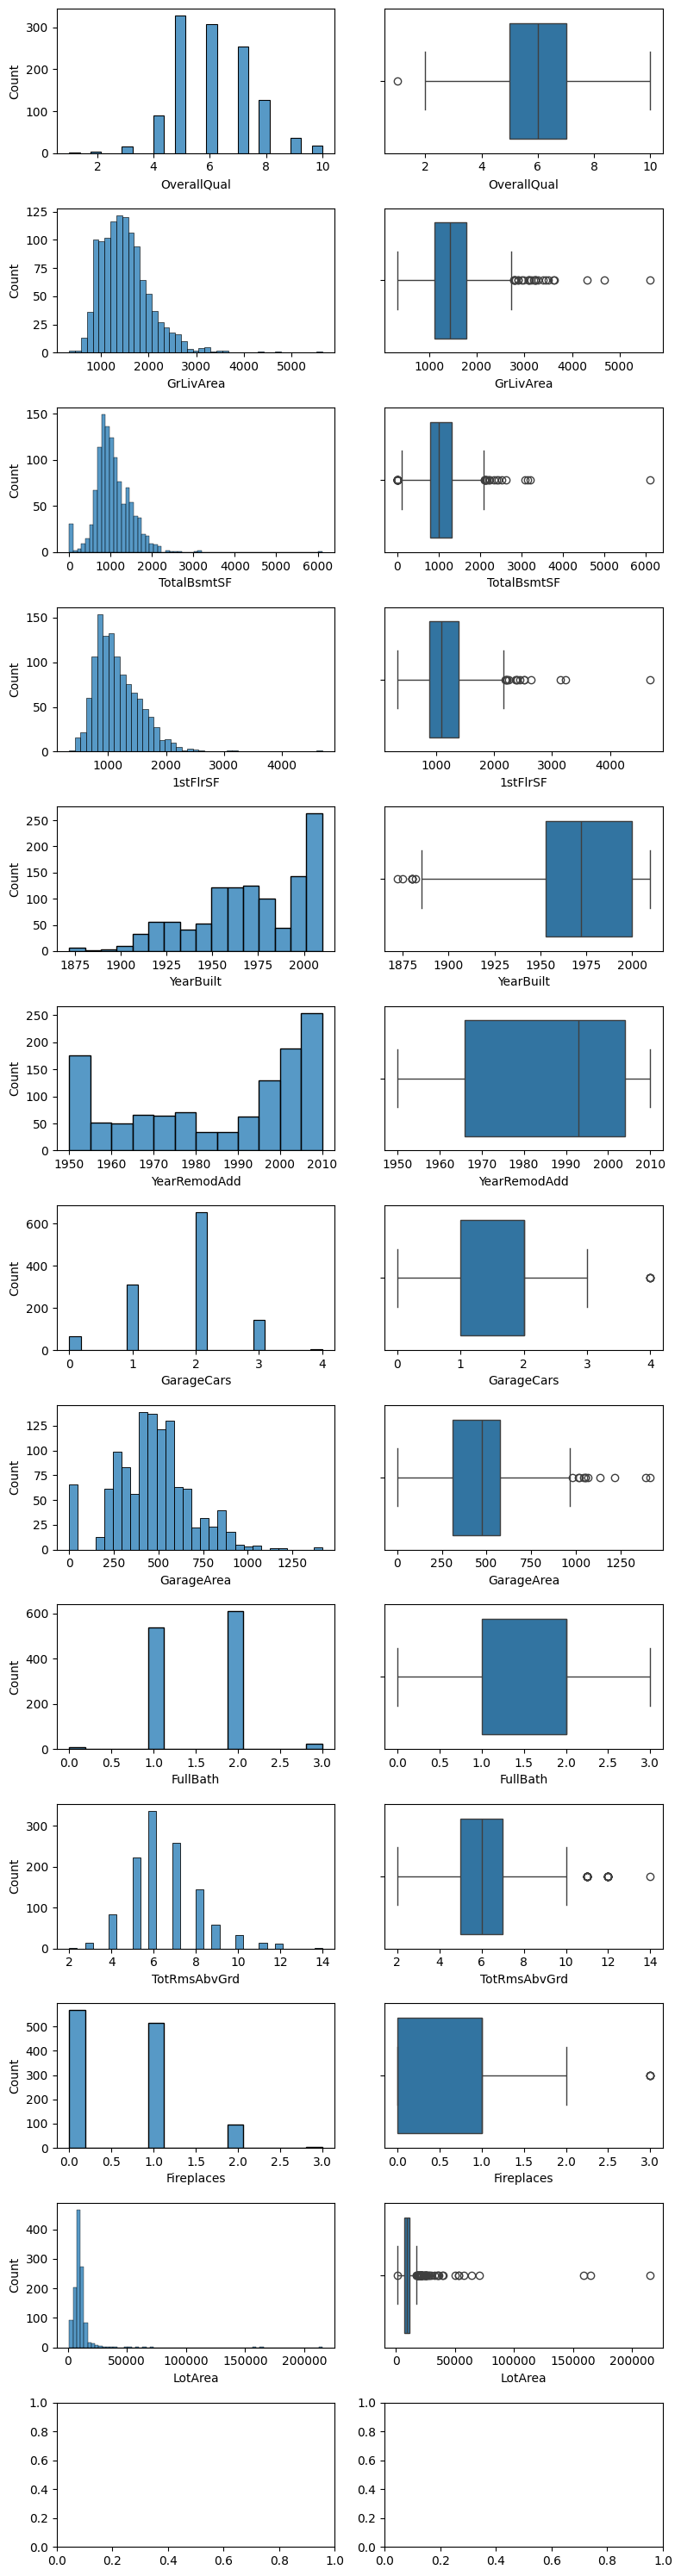

In [75]:
fig, ax = plt.subplots(nrows=len(num_col), ncols=2, figsize = (8,30))
for i in range(len(num_col)-1):
    sns.histplot(data=data, x=num_col[i], ax=ax[i][0])
    sns.boxplot(data=data, x=num_col[i], ax=ax[i][1])

    #ax[i][0].set_title(f'Distribution of {num_col[i]}')
    #ax[i][1].set_title(f'Boxplot of {num_col[i]}')    
plt.tight_layout()    
plt.show()    